In [1]:
# usual libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator

# libraries for data preprocessing
import nltk
import re
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

# libraries for vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# libraries for model selection
from sklearn.model_selection import train_test_split


In [2]:
# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400

# this setting widens how many characters pandas will display in a row:
pd.set_option('display.max_rows', 100)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# load data
spinarak_df = pd.read_csv('spinarak_articles.csv', encoding='iso-8859-1')

/var/folders/t4/n89gfp4s10b4j476kq4xh2p00000gn/T/ipykernel_10304/2415449546.py:2: DtypeWarning: Columns (6,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,2

In [6]:
spinarak_df = spinarak_df.drop(spinarak_df.filter(regex='Unnamed:').columns, axis=1)

In [7]:
spinarak_df.head(1)

,_id,blurp,categories,category,date,final_L2,is_inferred,keyphrases,named_entities,source,summary,tags,text,title,topics,url
0,62dea76aa1ca6a56d09c9e7b,The latest startup briefs from across the Asia Pacific region.,"[""Data Science & AI"",""Tech Organizations""]",News,2022-07-22T00:00:00.000Z,"[[""AI & Data Science"",0.446],[""Startups"",0.44]]",True,"[""Startups"",""startup demo day"",""Draper Startup House Manila"",""Recent Startup""]",[],krasia,"Startup Wire | Heart of the City. The latest startup briefs from across the Asia Pacific region. Startups Currently Raising Funds Fencore Location: Singapore Target: USD 200,000 seed round Fencore has developed an enterprise data management system to help organizations to improve workflows and integrate with other systems seamlessly. Besides eating the best local sisig and lechon, we will be r...",[],"Hi everyone. Taro here. Despite the persistent bear market sentiment and noticeable absence of funding news, investment rounds are still closing and products are still being launched. It is encouraging to see many startups making adjustments and getting on with the job. When things get tough, clearly the strong keep on trucking. The team is off to Manila next week. Besides eating the best loca...",Startup Wire | Heart of the City,"[""AI & Data Science"",""Startups""]",www.kr-asia.com/startup-wire-heart-of-the-city


In [8]:
spinarak_df.dropna(subset=['source'], inplace=True)

In [9]:
spinarak_df.shape

(76003, 16)

In [10]:
spinarak_df.isnull().sum()

_id                   0
blurp              5580
categories            0
category          25392
date                 12
final_L2              0
is_inferred           0
keyphrases            0
named_entities        1
source                0
summary              52
tags                 74
text                238
title               382
topics              369
url                 372
dtype: int64

In [11]:
spinarak_df.dropna(subset=['text'], inplace=True)

In [12]:
spinarak_df.isnull().sum()

_id                   0
blurp              5491
categories            0
category          25373
date                 12
final_L2              0
is_inferred           0
keyphrases            0
named_entities        0
source                0
summary               0
tags                  0
text                  0
title               284
topics              271
url                 274
dtype: int64

In [36]:
scmp_df = pd.read_csv('scmp_spider.csv', encoding='iso-8859-1', index_col=0)

In [37]:
scmp_df.head(4)

,title,summary,url,source
Are US-China ties on the up? Washingtonâs envoy meets Beijingâs commerce chief,Commerce minister Wang Wentao is the latest high-ranking Chinese official to meet with ambassador Nicholas Burns on his China trip\nSeries of meetings this week represent highest-level public engagements between US and China since relations soured in February over a suspected spy balloon\n,/economy/china-economy/article/3220234/are-us-china-ties-warming-ambassador-nicholas-burns-sits-down-commerce-minister-wang-wentao,us_china_spider,"Chinaâs commerce minister sat down with Washingtonâs ambassador to the country on Thursday to discuss trade and economic issues, both sides said, signalling a possible thawing in relations between the two powers after a prolonged and deepening chill. The meeting between Wang Wentao and Nicholas Burns was initiated at Washingtonâs request, according to a statement by the commerce ministry..."
Why did Chinese Foreign Minister Qin Gang stop in Potsdam?,The German city is the site of a defining moment in the post-war order and has special significance for Beijing.\n,/news/china/diplomacy/article/3220229/why-did-chinese-foreign-minister-qin-gang-stop-potsdam-and-how-it-tied-taiwan,us_china_spider,"With US-China tensions spiking again across the Taiwan Strait, Chinese Foreign Minister Qin Gang took time out on his three-nation tour of Europe on Wednesday for a stop in the small German city of Potsdam. Just southwest of Berlin, the city was the site of the Potsdam Conference in 1945, when the leaders of the United States, Britain, the Soviet Union and Chinese Kuomintang met in a defining ..."
USâs Janet Yellen takes aim at Russian sanctions evasion at G7 gathering,"âBecause these sanctions are having an impact, Russia is trying to get around themâ, Yellen said at a press conference in Niigata, Japan where she is meeting finance ministers and central bank governors from Group of Seven countries.\n",/news/world/united-states-canada/article/3220223/us-treasury-secretary-janet-yellen-takes-aim-russian-sanctions-evasion-g7-gathering-japan,us_china_spider,"United States Treasury Secretary Janet Yellen said Washington intends to crack down on Russiaâs ability to skirt sanctions imposed by the US and allies after its invasion of Ukraine. âBecause these sanctions are having an impact, Russia is trying to get around themâ, Yellen said at a press conference in Niigata, Japan. âThis year, a central piece of our strategy is to take further acti..."
ExclusiveBain offers China staff voluntary leave amid national security crackdown,The American consultancy giant is âcooperating as appropriateâ with authorities after Chinese police last month visited its offices in Shanghai and questioned its staff.\n,/tech/tech-trends/article/3220207/us-consulting-giant-bain-company-offers-china-staff-six-months-voluntary-leave-sources-say,us_china_spider,"US consultancy giant Bain & Company is offering some staff in China the option to take six monthsâ leave while earning a portion of their regular salaries, according to people familiar with the matter. Employees were informed this week of a new âcareer enrichment programmeâ, with those who are accepted being allowed to take a half-year leave to âlearn a new skillâ, according to sourc..."


In [38]:
# flatten df
scmp_df.columns = scmp_df.columns.map(''.join)
scmp_df = scmp_df.reset_index()

In [39]:
scmp_df.isnull().sum()

index       0
title      18
summary     0
url         0
source     18
dtype: int64

In [41]:
scmp_df.dropna(subset=['title', 'source'], inplace=True)

In [ ]:
# data cleaning and processing

# notes on data pre-processing :
1. there are a lot of special character
2. SCMP is only <100 articles, will be flooded by the current supply from our current database

In [42]:
spinarak_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75481 entries, 0 to 84638
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   _id              75481 non-null  object
 1   blurp            70012 non-null  object
 2   categories       75481 non-null  object
 3   category         50201 non-null  object
 4   date             75469 non-null  object
 5   final_L2         75481 non-null  object
 6   is_inferred      75481 non-null  object
 7   keyphrases       75481 non-null  object
 8   named_entities   75481 non-null  object
 9   source           75481 non-null  object
 10  summary          75481 non-null  object
 11  tags             75481 non-null  object
 12  text             75481 non-null  object
 13  title            75481 non-null  object
 14  topics           75472 non-null  object
 15  url              75469 non-null  object
 16  clean_text       75481 non-null  object
 17  tokens           75481 non-null

In [43]:
scmp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 733
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    716 non-null    object
 1   title    716 non-null    object
 2   summary  716 non-null    object
 3   url      716 non-null    object
 4   source   716 non-null    object
dtypes: object(5)
memory usage: 33.6+ KB


In [44]:
def clean_text(s):
    """
    Returns a cleaned version of the text by removing punctuations, digits. 
    Make upper case to lower case

    """
    s = s.lower() # make lower case
    s = re.sub(r'[^\w\s]','',s) # only words taken into account
    s = re.sub(r"\S*\d\S*", "", s).strip() # remove whitespaces and capture words with digits
    s = re.sub(r'\d+'," ", s) # this removes digit
    s = re.sub(r'_+'," ", s) # this removes underscore 
    s = re.sub(r'[^a-zA-Z0-9]+'," ", s) # special characters
    s = re.sub(r'-+', " ", s) # replace hyphens with spaces
    s = " ".join(s.split()) # remove extra whitespace
    return s

In [45]:
spinarak_df['clean_text'] = spinarak_df['text'].apply(clean_text)

In [46]:
scmp_df.isnull().sum()

index      0
title      0
summary    0
url        0
source     0
dtype: int64

In [47]:
scmp_df['clean_text'] = scmp_df['source'].apply(clean_text)

In [48]:
# tokenize with nltk
def tokenize_text(s):
    """Returns a message with word_tokenize package from nltk library"""
    return word_tokenize(s.lower())

In [49]:
spinarak_df['tokens'] = spinarak_df['clean_text'].apply(tokenize_text)

In [50]:
scmp_df['tokens'] = scmp_df['clean_text'].apply(tokenize_text)

In [51]:
# remove rare words from both the df

#count words
from collections import Counter
cnt = Counter()
for text in spinarak_df["clean_text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('the', 2650991),
 ('to', 1497166),
 ('and', 1444525),
 ('of', 1206514),
 ('a', 1080210),
 ('in', 980306),
 ('that', 572533),
 ('for', 539468),
 ('is', 473084),
 ('on', 402203)]

In [52]:
cnt_scmp = Counter()
for text in scmp_df["clean_text"].values:
    for word in text.split():
        cnt_scmp[word] += 1
        
cnt_scmp.most_common(10)

[('the', 32836),
 ('to', 17458),
 ('and', 14318),
 ('of', 13139),
 ('in', 12208),
 ('a', 10933),
 ('s', 7600),
 ('china', 6913),
 ('us', 6227),
 ('that', 6154)]

In [28]:
# remove stop words from the tokens from nltk.corpus for both the df

# include the common words found on the threads
english_stopwords = stopwords.words('english')
english_stopwords.extend(['hi', 'hello', 'welcome', 'roundup', 'said', 'would', 'also'])

In [29]:
def filtered_text(words):
    """Remove common english stop words from defined array. Also remove numbers"""
    filtered_words = [word for word in words if (word not in english_stopwords) and (not word.isdigit())]
    return filtered_words

In [30]:
spinarak_df['filtered_tokens'] = spinarak_df['tokens'].apply(filtered_text)

In [53]:
scmp_df['filtered_tokens'] = scmp_df['tokens'].apply(filtered_text)

In [54]:
spinarak_df.isnull().sum() 

_id                    0
blurp               5469
categories             0
category           25280
date                  12
final_L2               0
is_inferred            0
keyphrases             0
named_entities         0
source                 0
summary                0
tags                   0
text                   0
title                  0
topics                 9
url                   12
clean_text             0
tokens                 0
filtered_tokens        0
lem_tokens             0
dtype: int64

In [55]:
scmp_df.isnull().sum()

index              0
title              0
summary            0
url                0
source             0
clean_text         0
tokens             0
filtered_tokens    0
dtype: int64

In [ ]:
#import string

In [56]:
from nltk.stem import WordNetLemmatizer

In [57]:
# initiate lemmatizer
lemmatizer = WordNetLemmatizer()

In [58]:
def lemmatize_text(words):
    tokens_lem = [lemmatizer.lemmatize(w) for w in words]
    return tokens_lem

In [59]:
spinarak_df['lem_tokens'] = spinarak_df['filtered_tokens'].apply(lemmatize_text)

In [60]:
scmp_df['lem_tokens'] = scmp_df['filtered_tokens'].apply(lemmatize_text)

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
scmp_df.head()

,index,title,summary,url,source,clean_text,tokens,filtered_tokens,lem_tokens
0,Are US-China ties on the up? Washingtonâs envoy meets Beijingâs commerce chief,Commerce minister Wang Wentao is the latest high-ranking Chinese official to meet with ambassador Nicholas Burns on his China trip\nSeries of meetings this week represent highest-level public engagements between US and China since relations soured in February over a suspected spy balloon\n,/economy/china-economy/article/3220234/are-us-china-ties-warming-ambassador-nicholas-burns-sits-down-commerce-minister-wang-wentao,us_china_spider,"Chinaâs commerce minister sat down with Washingtonâs ambassador to the country on Thursday to discuss trade and economic issues, both sides said, signalling a possible thawing in relations between the two powers after a prolonged and deepening chill. The meeting between Wang Wentao and Nicholas Burns was initiated at Washingtonâs request, according to a statement by the commerce ministry...",china s commerce minister sat down with washington s ambassador to the country on thursday to discuss trade and economic issues both sides said signalling a possible thawing in relations between the two powers after a prolonged and deepening chill the meeting between wang wentao and nicholas burns was initiated at washington s request according to a statement by the commerce ministry the facet...,"[china, s, commerce, minister, sat, down, with, washington, s, ambassador, to, the, country, on, thursday, to, discuss, trade, and, economic, issues, both, sides, said, signalling, a, possible, thawing, in, relations, between, the, two, powers, after, a, prolonged, and, deepening, chill, the, meeting, between, wang, wentao, and, nicholas, burns, was, initiated, at, washington, s, request, acco...","[china, commerce, minister, sat, washington, ambassador, country, thursday, discuss, trade, economic, issues, sides, signalling, possible, thawing, relations, two, powers, prolonged, deepening, chill, meeting, wang, wentao, nicholas, burns, initiated, washington, request, according, statement, commerce, ministry, facetoface, chat, came, monday, meeting, burns, foreign, minister, qin, gang, hig...","[china, commerce, minister, sat, washington, ambassador, country, thursday, discus, trade, economic, issue, side, signalling, possible, thawing, relation, two, power, prolonged, deepening, chill, meeting, wang, wentao, nicholas, burn, initiated, washington, request, according, statement, commerce, ministry, facetoface, chat, came, monday, meeting, burn, foreign, minister, qin, gang, highestlev..."
1,Why did Chinese Foreign Minister Qin Gang stop in Potsdam?,The German city is the site of a defining moment in the post-war order and has special significance for Beijing.\n,/news/china/diplomacy/article/3220229/why-did-chinese-foreign-minister-qin-gang-stop-potsdam-and-how-it-tied-taiwan,us_china_spider,"With US-China tensions spiking again across the Taiwan Strait, Chinese Foreign Minister Qin Gang took time out on his three-nation tour of Europe on Wednesday for a stop in the small German city of Potsdam. Just southwest of Berlin, the city was the site of the Potsdam Conference in 1945, when the leaders of the United States, Britain, the Soviet Union and Chinese Kuomintang met in a defining ...",with uschina tensions spiking again across the taiwan strait chinese foreign minister qin gang took time out on his threenation tour of europe on wednesday for a stop in the small german city of potsdam just southwest of berlin the city was the site of the potsdam conference in when the leaders of the united states britain the soviet union and chinese kuomintang met in a defining moment for th...,"[with, uschina, tensions, spiking, again, across, the, taiwan, strait, chinese, foreign, minister, qin, gang, took, time, out, on, his, threenation, tour, of, europe, on, wednesday, for, a, stop, in, the, small, german, city, of, potsdam, just, southwest, of, berlin, the, city, wa

In [63]:
c_vec = CountVectorizer(stop_words=english_stopwords, ngram_range=(2,3))

# matrix of ngrams
ngrams = c_vec.fit_transform(scmp_df['lem_tokens'].map(' '.join))

# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)

# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [64]:
scmp_top20_words = df_ngram.head(20)

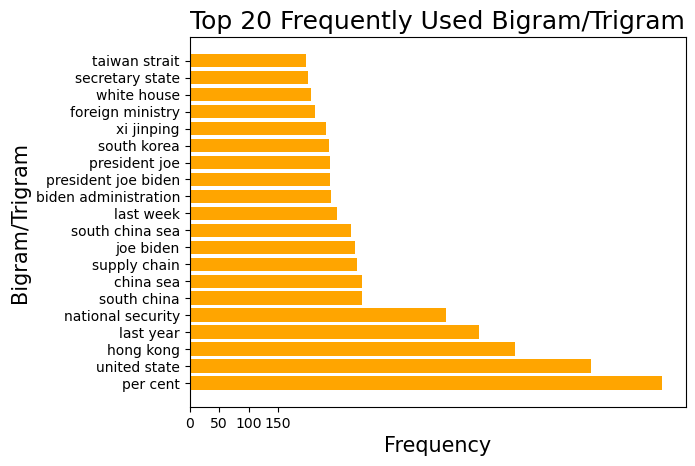

In [65]:
plt.barh(scmp_top20_words['bigram/trigram'], scmp_top20_words['frequency'], color='orange')
scmp_top20_words = scmp_top20_words.sort_values(by='frequency', ascending=False)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Bigram/Trigram', fontsize=15)
plt.xticks(np.arange(0, 200, step=50))
plt.title('Top 20 Frequently Used Bigram/Trigram', fontsize=18)
plt.show()

In [66]:
scmp_top20_words

,frequency,bigram/trigram
0,801,per cent
1,680,united state
2,551,hong kong
3,491,last year
4,434,national security
5,292,south china
6,292,china sea
7,284,supply chain
8,281,joe biden
9,274,south china sea


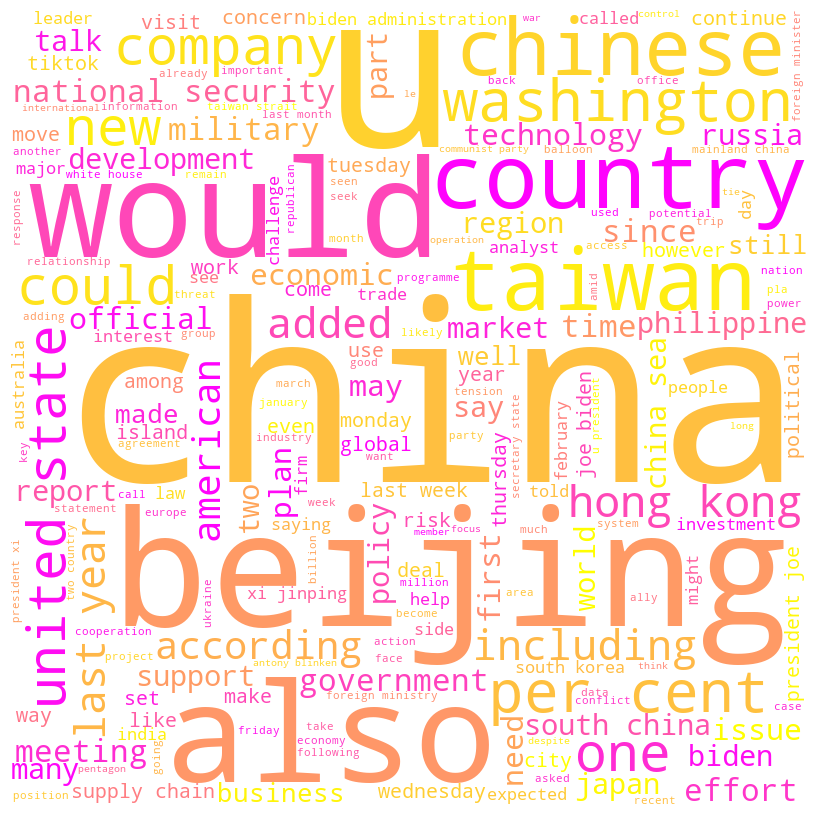

In [67]:
# generate a world cloud for exploratory analysis

comment_words = " "
stopwords = english_stopwords
 
# iterate through the csv file
for val in scmp_df['lem_tokens']:
     
    # typecaste each val to string
    val = str(val)
 
    tokens = re.findall(r'\b\w+\b', val)
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)
 
wordcloud = WordCloud(width = 800, height = 800,
                colormap="spring",
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [68]:
df_ngram.head(100)

,frequency,bigram/trigram
0,801,per cent
1,680,united state
2,551,hong kong
3,491,last year
4,434,national security
5,292,south china
6,292,china sea
7,284,supply chain
8,281,joe biden
9,274,south china sea


In [ ]:
# this is too huge, need to run it in cloud
c_vec = CountVectorizer(stop_words=english_stopwords, ngram_range=(2,3))

# matrix of ngrams
ngrams = c_vec.fit_transform(spinarak_df['lem_tokens'].map(' '.join))

# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)

# list of ngrams
vocab = c_vec.vocabulary_
df_ngram_spinarak = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [ ]:
df_ngram_spinarak.head(20)

In [ ]:
# export the .csv files

In [70]:
spinarak_df.to_csv('./clean_spinarak.csv', index=False)

In [71]:
scmp_df.to_csv('./clean_scmp.csv', index=False)

In [ ]:
# modelling using bert

In [ ]:
from bertopic import BERTopic

In [ ]:
# use LDA
from sklearn.decomposition import LatentDirichletAllocation
import gensim
from gensim.utils import simple_preprocess

In [ ]:
import gensim
import gensim.downloader as api
from gensim.models.word2vec import Word2Vec
from transformers import pipeline

In [ ]:
# uhm why do i need a freq table again?

def generate_frequency_table(sentences, stopwords):
    """Generate a frequency table to weight the words in the text
    
    Args: 
    sentences: list of sentences 
    stopwords: list of stopwords
    Returns:
    freq_table: dict of (word, # occurrence)
    """
    freq_table = {}

    # loop through each sentence
    for index, sentence in enumerate(sentences):
        if sentence.startswith("This article is part of"):
            continue

        sentence = re.sub(r"[%s]" % string.punctuation, "", sentence.lower())
        words = sentence.split()

        # loop through each word in the sentence
        for w in words:
            w = w.strip(string.punctuation)
            # if word is a stopword or is numeric, ignore
            if (w in stopwords) or (w.isnumeric()):
                continue
            # else, add a count to frequence table 
            elif w in freq_table:
                freq_table[w] += 1
            else:
                freq_table[w] = 1

    return freq_table

In [ ]:
#text_df['tokens'].apply(generate_frequency_table)
text_df['freq_table'] = text_df['filtered_tokens'].apply(lambda x: generate_frequency_table(x, english_stopwords))

In [ ]:
text_df.head()